# Number of phenotypes explained by the sensitivity of the genome to changes in transcription:

---

## loading required libraries:

In [9]:
library("jtools")
library("latticeExtra")
library("tidyverse")

Loading required package: lattice


Attaching package: ‘latticeExtra’


The following object is masked from ‘package:ggplot2’:

    layer




## loading working database from file:

In [3]:
working.db <- read_csv("File_S1.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  org_id = col_double(),
  phen_id = col_double(),
  trans_id = col_double(),
  n_env = col_double(),
  trans_length = col_double(),
  fitness = col_double(),
  equ = col_double(),
  xor = col_double(),
  nor = col_double(),
  andn = col_double(),
  or = col_double(),
  orn = col_double(),
  and = col_double(),
  nand = col_double(),
  not = col_double()
)




## getting data:

In [4]:
#robust-transcriptome = sensitive_trans = 0
#sensitive-transcriptome = sensitive_trans = 1
db <- working.db %>%
    group_by(org_id) %>%
    summarise(n_phen = n_distinct(phen_id), n_trans = n_distinct(trans_id), .groups = 'drop') %>%
    mutate(sensitive_trans = as.factor(ifelse(n_trans == 1, 0, 1)))

## showing some data:

In [5]:
db %>% filter(sensitive_trans == 0) %>% nrow
db %>% filter(sensitive_trans == 1) %>% nrow
sample_n(db, 5)

[1] 415154

[1] 95676

org_id n_phen n_trans sensitive_trans
1 359978  1       1     0              
2 438128  1       1     0              
3  43546  4      40     1              
4 106516 11     322     1              
5 362811  3     115     1

##  generalized linear regression model (Table 1, middle):

In [6]:
m <- glm(n_phen ~ sensitive_trans,
         data = db,
         family = poisson(link = "log"))
summary(m)
summ(m, robust = "HC1", scale = FALSE, confint = TRUE, digits = 3, pvals = FALSE, exp = FALSE)


Call:
glm(formula = n_phen ~ sensitive_trans, family = poisson(link = "log"), 
    data = db)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3556  -1.2556  -1.2556   0.1014  26.5116  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.0394714  0.0009229  1126.3   <2e-16 ***
sensitive_trans1 0.6606215  0.0016616   397.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2147401  on 510829  degrees of freedom
Residual deviance: 2003830  on 510828  degrees of freedom
AIC: 3340779

Number of Fisher Scoring iterations: 5


MODEL INFO:
Observations: 510830
Dependent Variable: n_phen
Type: Generalized linear model
  Family: poisson 
  Link function: log 

MODEL FIT:
χ²(1) = 143570.185, p = 0.000
Pseudo-R² (Cragg-Uhler) = 0.245
Pseudo-R² (McFadden) = 0.041
AIC = 3340778.631, BIC = 3340800.918 

Standard errors: Robust, type = HC1
--------------------------------------------------------
                          Est.    2.5%   97.5%    z val.
---------------------- ------- ------- ------- ---------
(Intercept)              1.039   1.034   1.045   400.035
sensitive_trans1         0.661   0.652   0.670   145.377
--------------------------------------------------------

## plotting the contour map:

In [7]:
d_n <- db %>% group_by(n_phen, n_trans) %>% summarize(n = n(), .groups = 'drop')
d_n %>% head

n_phen n_trans n     
1 1      1       264107
2 1      2         3419
3 1      3          574
4 1      4          520
5 1      5          322
6 1      6          278

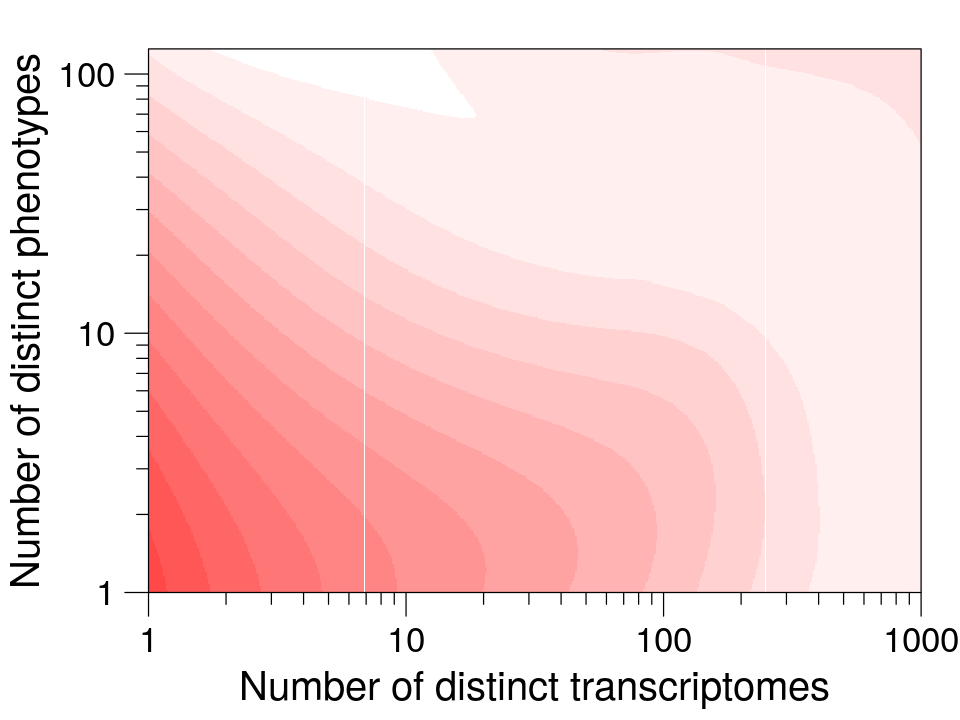

In [14]:
options(repr.plot.width = 8, repr.plot.height = 6)
# levelplot (library latticeExtra)
levelplot(log(n)/max(log(n)) ~ n_trans * n_phen, d_n,
          panel = panel.levelplot.points, cex = 0,
          col.regions = hsv(1, seq(0, 0.9, length.out = 100) , 1),
          xlab = list(label = "Number of distinct transcriptomes", cex = 2),
          ylab = list(label = "Number of distinct phenotypes", cex = 2),
          scales = list(x = list(log = 10), y = list(log = 10), cex = 1.75, tck = c(2.5, 0)),
          xscale.components = xscale.components.log10ticks,
          yscale.components = yscale.components.log10ticks,
          xlim = range(d_n$n_trans), ylim = range(d_n$n_phen),
          colorkey = FALSE
         ) +
layer_(panel.2dsmoother(..., n = 500))

---